# <font color=green> Cyclist Bike_share Analysis. </font>

### Importing the  Libraries and Files

In [3]:
import os
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
files=os.listdir(r"C:\Users\Ajit\Desktop\Projects\Cyclist-bike-share\cyclist_data")
files

['202012-divvy-tripdata.csv',
 '202101-divvy-tripdata.csv',
 '202102-divvy-tripdata.csv',
 '202103-divvy-tripdata.csv',
 '202104-divvy-tripdata.csv',
 '202105-divvy-tripdata.csv',
 '202106-divvy-tripdata.csv',
 '202107-divvy-tripdata.csv',
 '202108-divvy-tripdata.csv',
 '202109-divvy-tripdata.csv',
 '202110-divvy-tripdata.csv',
 '202111-divvy-tripdata.csv']

### Concatinating all the 12 months trip data to a single file

In [5]:
path=r"C:\Users\Ajit\Desktop\Projects\Cyclist-bike-share\cyclist_data"
cyclist_df=pd.DataFrame()
for data in files:
    df=pd.read_csv(path+"/"+data,encoding="utf-8")
    cyclist_df=pd.concat([cyclist_df,df])

In [6]:
cyclist_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,70B6A9A437D4C30D,classic_bike,2020-12-27 12:44:29,2020-12-27 12:55:06,Aberdeen St & Jackson Blvd,13157,Desplaines St & Kinzie St,TA1306000003,41.877726,-87.654787,41.888716,-87.644448,member
1,158A465D4E74C54A,electric_bike,2020-12-18 17:37:15,2020-12-18 17:44:19,NaN,NaN,NaN,NaN,41.930000,-87.700000,41.910000,-87.700000,member
2,5262016E0F1F2F9A,electric_bike,2020-12-15 15:04:33,2020-12-15 15:11:28,NaN,NaN,NaN,NaN,41.910000,-87.690000,41.930000,-87.700000,member
3,BE119628E44F871E,electric_bike,2020-12-15 15:54:18,2020-12-15 16:00:11,NaN,NaN,NaN,NaN,41.920000,-87.700000,41.910000,-87.700000,member
4,69AF78D57854E110,electric_bike,2020-12-22 12:08:17,2020-12-22 12:10:59,NaN,NaN,NaN,NaN,41.800000,-87.590000,41.800000,-87.590000,member


### Exploring the Structure of data and missing values

In [5]:
cyclist_df.shape

(5479096, 13)

In [6]:
cyclist_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5479096 entries, 0 to 359977
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 585.2+ MB


In [7]:
cyclist_df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    651445
start_station_id      651442
end_station_name      698909
end_station_id        698909
start_lat                  0
start_lng                  0
end_lat                 4738
end_lng                 4738
member_casual              0
dtype: int64

In [8]:
# Renaming the columns
cyclist_df.rename(columns={"rideable_type":"ride_type","member_casual":"subscription_type"},inplace=True)

### Converting "started_at" and "ended_at" columns to datetime and Performing Feature Engineering

In [9]:
cyclist_df["started_at"]=pd.to_datetime(cyclist_df["started_at"])
cyclist_df["started_at"].dtypes

dtype('<M8[ns]')

In [10]:
cyclist_df["ended_at"]=pd.to_datetime(cyclist_df["ended_at"])
cyclist_df["ended_at"].dtypes

dtype('<M8[ns]')

In [11]:
cyclist_df["start_day"]=cyclist_df["started_at"].dt.day
cyclist_df["month"]=cyclist_df["started_at"].dt.month
cyclist_df["year"]=cyclist_df["started_at"].dt.year
cyclist_df["week_day"]=cyclist_df["started_at"].dt.day_name()

In [12]:
cyclist_df.head()

,ride_id,ride_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,subscription_type,start_day,month,year,week_day
0,70B6A9A437D4C30D,classic_bike,2020-12-27 12:44:29,2020-12-27 12:55:06,Aberdeen St & Jackson Blvd,13157,Desplaines St & Kinzie St,TA1306000003,41.877726,-87.654787,41.888716,-87.644448,member,27,12,2020,Sunday
1,158A465D4E74C54A,electric_bike,2020-12-18 17:37:15,2020-12-18 17:44:19,NaN,NaN,NaN,NaN,41.930000,-87.700000,41.910000,-87.700000,member,18,12,2020,Friday
2,5262016E0F1F2F9A,electric_bike,2020-12-15 15:04:33,2020-12-15 15:11:28,NaN,NaN,NaN,NaN,41.910000,-87.690000,41.930000,-87.700000,member,15,12,2020,Tuesday
3,BE119628E44F871E,electric_bike,2020-12-15 15:54:18,2020-12-15 16:00:11,NaN,NaN,NaN,NaN,41.920000,-87.700000,41.910000,-87.700000,member,15,12,2020,Tuesday
4,69AF78D57854E110,electric_bike,2020-12-22 12:08:17,2020-12-22 12:10:59,NaN,NaN,NaN,NaN,41.800000,-87.590000,41.800000,-87.590000,member,22,12,2020,Tuesday


In [13]:
cyclist_df.tail()

,ride_id,ride_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,subscription_type,start_day,month,year,week_day
359973,E00E9F3500D69BAA,electric_bike,2021-11-29 00:39:13,2021-11-29 00:51:41,Logan Blvd & Elston Ave,TA1308000031,NaN,NaN,41.929454,-87.684195,41.93,-87.72,member,29,11,2021,Monday
359974,8EAA66CE314E5FF1,electric_bike,2021-11-03 13:56:33,2021-11-03 14:01:27,Logan Blvd & Elston Ave,TA1308000031,NaN,NaN,41.929441,-87.684180,41.94,-87.69,member,3,11,2021,Wednesday
359975,36C2DC8BB1E13491,electric_bike,2021-11-02 19:32:18,2021-11-02 19:36:16,Logan Blvd & Elston Ave,TA1308000031,NaN,NaN,41.929452,-87.684135,41.94,-87.69,member,2,11,2021,Tuesday
359976,8E42FE5C67DF6A96,electric_bike,2021-11-10 20:15:06,2021-11-10 20:22:01,Logan Blvd & Elston Ave,TA1308000031,NaN,NaN,41.929428,-87.684175,41.94,-87.69,member,10,11,2021,Wednesday
359977,4F15069E2D2519BC,electric_bike,2021-11-30 20:18:00,2021-11-30 20:37:27,Ogden Ave & Chicago Ave,TA1305000020,NaN,NaN,41.896354,-87.653982,41.95,-87.70,member,30,11,2021,Tuesday


In [14]:
cyclist_df.to_csv(r"C:\Users\Ajit\Desktop\Projects\Cyclist-bike-share\cyclist_alltrips_data.csv")  #saving the clean data

## Top 10 start station's visited by the Rider's.

In [17]:
Top_start_station=cyclist_df.groupby("start_station_name").agg(Count=('ride_id','count')).sort_values(by='Count',ascending=False)
Top_start_station.head(10)

,Count
start_station_name,
Streeter Dr & Grand Ave,81780
Michigan Ave & Oak St,44130
Wells St & Concord Ln,43010
Millennium Park,41563
Clark St & Elm St,40834
Wells St & Elm St,37172
Theater on the Lake,36883
Clark St & Lincoln Ave,33114
Clark St & Armitage Ave,32713


## Top 10 End station's visited by the Rider's.

In [18]:
Top_end_station=cyclist_df.groupby("end_station_name").agg(Count=('ride_id','count')).sort_values(by='Count',ascending=False)
Top_end_station.head(10)

,Count
end_station_name,
Streeter Dr & Grand Ave,82316
Michigan Ave & Oak St,44606
Wells St & Concord Ln,43325
Millennium Park,42185
Clark St & Elm St,40236
Theater on the Lake,37093
Wells St & Elm St,36946
Clark St & Lincoln Ave,33011
Wabash Ave & Grand Ave,32794


In [15]:
## Calculating the average ride length

cyclist_df["ride_length"]=cyclist_df["ended_at"]-cyclist_df["started_at"]
cyclist_df["ride_length"]

0        00:10:37
1        00:07:04
2        00:06:55
3        00:05:53
4        00:02:42
           ...   
359973   00:12:28
359974   00:04:54
359975   00:03:58
359976   00:06:55
359977   00:19:27
Name: ride_length, Length: 5479096, dtype: timedelta64[ns]

In [16]:
cyclist_df.head(2)

,ride_id,ride_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,subscription_type,start_day,month,year,week_day,ride_length
0,70B6A9A437D4C30D,classic_bike,2020-12-27 12:44:29,2020-12-27 12:55:06,Aberdeen St & Jackson Blvd,13157,Desplaines St & Kinzie St,TA1306000003,41.877726,-87.654787,41.888716,-87.644448,member,27,12,2020,Sunday,00:10:37
1,158A465D4E74C54A,electric_bike,2020-12-18 17:37:15,2020-12-18 17:44:19,NaN,NaN,NaN,NaN,41.930000,-87.700000,41.910000,-87.700000,member,18,12,2020,Friday,00:07:04


## Creating a new DataFrame for analysis.

In [17]:
cyclist_new=cyclist_df[["ride_id","ride_type","started_at","ended_at","start_day","month","year",
                        "week_day","ride_length","subscription_type"]]
cyclist_new.head()

,ride_id,ride_type,started_at,ended_at,start_day,month,year,week_day,ride_length,subscription_type
0,70B6A9A437D4C30D,classic_bike,2020-12-27 12:44:29,2020-12-27 12:55:06,27,12,2020,Sunday,00:10:37,member
1,158A465D4E74C54A,electric_bike,2020-12-18 17:37:15,2020-12-18 17:44:19,18,12,2020,Friday,00:07:04,member
2,5262016E0F1F2F9A,electric_bike,2020-12-15 15:04:33,2020-12-15 15:11:28,15,12,2020,Tuesday,00:06:55,member
3,BE119628E44F871E,electric_bike,2020-12-15 15:54:18,2020-12-15 16:00:11,15,12,2020,Tuesday,00:05:53,member
4,69AF78D57854E110,electric_bike,2020-12-22 12:08:17,2020-12-22 12:10:59,22,12,2020,Tuesday,00:02:42,member


In [18]:
cyclist_new.shape

(5479096, 10)

In [19]:
cyclist_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5479096 entries, 0 to 359977
Data columns (total 10 columns):
 #   Column             Dtype          
---  ------             -----          
 0   ride_id            object         
 1   ride_type          object         
 2   started_at         datetime64[ns] 
 3   ended_at           datetime64[ns] 
 4   start_day          int64          
 5   month              int64          
 6   year               int64          
 7   week_day           object         
 8   ride_length        timedelta64[ns]
 9   subscription_type  object         
dtypes: datetime64[ns](2), int64(3), object(4), timedelta64[ns](1)
memory usage: 459.8+ MB


In [20]:
cyclist_new.isnull().sum()

ride_id              0
ride_type            0
started_at           0
ended_at             0
start_day            0
month                0
year                 0
week_day             0
ride_length          0
subscription_type    0
dtype: int64

In [21]:
# Highest Frequency of the weekdays
cyclist_new["week_day"].mode()

0    Saturday
dtype: object

## <font color=green> The above analysis shows that most of the rides occured on Saturday than any other day.</font>

In [22]:
mean_ride_len=cyclist_new["ride_length"].mean()
mean_ride_len

Timedelta('0 days 00:20:09.218658')

In [23]:
max_ride_len=cyclist_new["ride_length"].max()
max_ride_len

Timedelta('38 days 20:24:09')

## <font color=green>The average duration of ride_length is '0 days 00:20:31.754192'.<br> The maximum duartion of ride_length is '38 days 20:24:09' </font>

## Exploring the Categorical columns.

In [24]:
cyclist_new["ride_type"].unique()

array(['classic_bike', 'electric_bike', 'docked_bike'], dtype=object)

In [25]:
types_ride=cyclist_new["ride_type"].value_counts()
types_ride

classic_bike     3221009
electric_bike    1937668
docked_bike       320419
Name: ride_type, dtype: int64

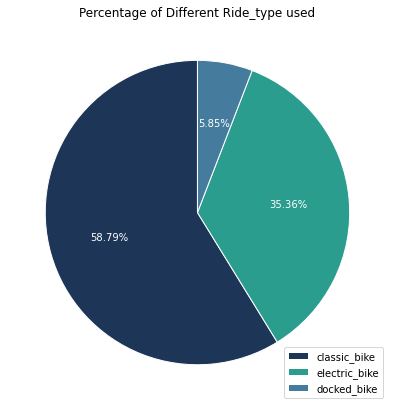

In [26]:
plt.rcParams["figure.figsize"]=(7,7)
label=["classic_bike","electric_bike","docked_bike"]
color =["#1D3557","#2A9D8F","#457B9D"]
plt.pie(types_ride.values,colors=color,startangle=90,autopct="%1.2f%%",
        wedgeprops={"edgecolor":"white"},textprops=dict(color="w"))
plt.title("Percentage of Different Ride_type used")
plt.legend(types_ride.index,loc="best")
plt.show()

## <font color=green>Ride_type column has: 56.13% Classic_Bike , 35.65% electric_bike , 8.22% Docked_bike</font>

In [27]:
cyclist_new["subscription_type"].unique()

array(['member', 'casual'], dtype=object)

In [28]:
types_subs=cyclist_new["subscription_type"].value_counts()
types_subs

member    2989749
casual    2489347
Name: subscription_type, dtype: int64

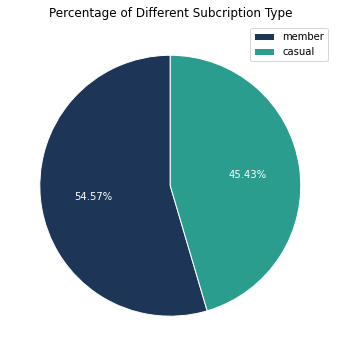

In [29]:
plt.rcParams["figure.figsize"]=(6,6)
color =["#1D3557","#2A9D8F"] #"#457B9D"]
plt.pie(types_subs.values,colors=color,startangle=90,autopct="%1.2f%%",
        wedgeprops={"edgecolor":"white"},textprops=dict(color="w"))
plt.title("Percentage of Different Subcription Type")
plt.legend(types_subs.index,loc="best")
plt.show()

## <font color=green> The Subscription_type columns has : 55.09% Member riders and 44.91% Casual riders.</font>

## Types of bikes preferred by Customers(member,casual).

In [31]:
ride_preference = cyclist_new.groupby("ride_type")["subscription_type"].value_counts()
ride_preference

ride_type      subscription_type
classic_bike   member               1962839
               casual               1258170
docked_bike    casual                312382
               member                  8037
electric_bike  member               1018873
               casual                918795
Name: subscription_type, dtype: int64

In [32]:
bike_type=[]
subscription=[]
values=list(ride_preference.values)

for i,j in ride_preference.index:
    bike_type.append(i)
    subscription.append(j)
    


Text(0, 0.5, 'Count')

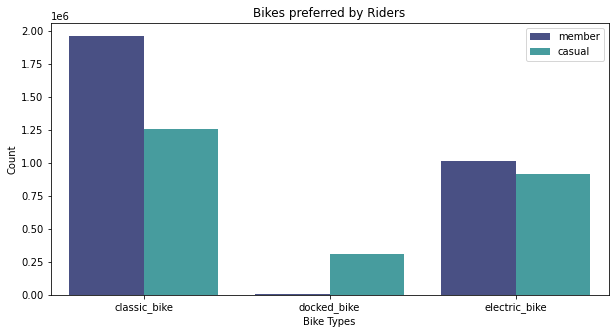

In [33]:
plt.rcParams["figure.figsize"]=(10,5)
plot=sns.barplot(x=bike_type,y=values,hue=subscription,palette="mako")
plot.set(title="Bikes preferred by Riders")
plot.set_xlabel("Bike Types")
plot.set_ylabel("Count")

## <font color=black> Observation:</font>
* ### <font color=green> __Classic Bikes are mostly used by Members__</font>
* ### <font color=green> __Docked Bikes are mostly used by Casuals__</font>
* ### <font color=green> __Electric bikes are used by both__</font>

In [34]:
ride_by_week=cyclist_new.groupby("week_day")["subscription_type"].value_counts()
ride_by_week

week_day   subscription_type
Friday     member               429349
           casual               354586
Monday     member               407628
           casual               282185
Saturday   casual               551487
           member               425470
Sunday     casual               477822
           member               372540
Thursday   member               433105
           casual               278198
Tuesday    member               460832
           casual               272208
Wednesday  member               460825
           casual               272861
Name: subscription_type, dtype: int64

In [35]:
weekday=[]
subscription_w=[]
values_w=list(ride_by_week.values)

for i,j in ride_by_week.index:
    weekday.append(i)
    subscription_w.append(j)

Text(0, 0.5, 'Count')

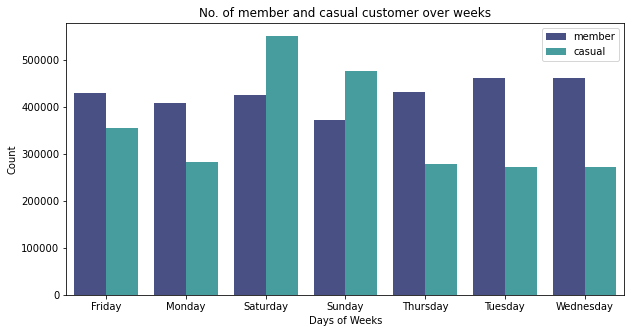

In [36]:
plt.rcParams["figure.figsize"]=(10,5)
plot=sns.barplot(x=weekday,y=values_w,hue=subscription_w,palette="mako")
plot.set(title="No. of member and casual customer over weeks")
plot.set_xlabel("Days of Weeks")
plot.set_ylabel("Count")

## Observations:
* ### <font color=green>Maximum rides are done on Saturday followed by Sunday, and count of casual riders are high on those days</font>
* ### <font color=green>Counts of member riders are high from Sunday to Thrusday.</font>

In [37]:
subs_month=cyclist_new.groupby("month")["subscription_type"].value_counts()
subs_month

month  subscription_type
1      member                78717
       casual                18117
2      member                39491
       casual                10131
3      member               144463
       casual                84033
4      member               200629
       casual               136601
5      member               274717
       casual               256916
6      casual               370681
       member               358914
7      casual               442056
       member               380354
8      casual               412671
       member               391681
9      member               392257
       casual               363890
10     member               373984
       casual               257242
11     member               253049
       casual               106929
12     member               101493
       casual                30080
Name: subscription_type, dtype: int64

In [38]:
month=[]
subscription=[]
values=list(subs_month.values)

for i,j in subs_month.index:
    month.append(i)
    subscription.append(j)

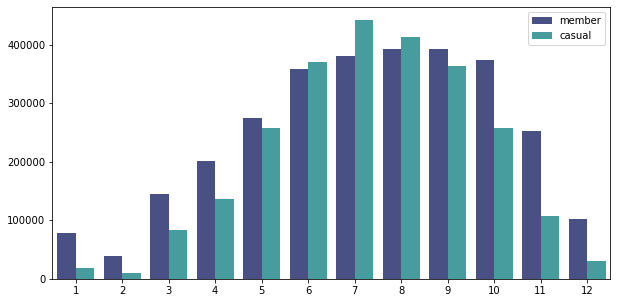

In [39]:
plt.rcParams["figure.figsize"]=(10,5)
sns.barplot(x=month,y=values,hue=subscription,palette="mako")

## Observations:
* ### <font color=green>From month 6 to 8 Casual Riders are more than Member Riders</font>
* ### <font color=green>Count of Casual Riders are low at the start and end of the year</font>
* ### <font color=green>Count of Member Rides are high at the start and end of the year</font>

In [40]:
mean_ride_week=cyclist_new.groupby(["week_day","subscription_type"])["ride_length"].mean(numeric_only=False)
mean_ride_week

week_day   subscription_type
Friday     casual                       00:30:34.868536
           member                       00:13:28.198984
Monday     casual                       00:31:59.127076
           member                       00:13:20.592947
Saturday   casual                       00:34:54.254219
           member                       00:15:21.240235
Sunday     casual                       00:37:44.300364
           member                       00:15:45.769297
Thursday   casual                       00:27:52.816102
           member                       00:12:55.931898
Tuesday    casual                       00:19:42.468446
           member              -1 days +23:54:17.701819
Wednesday  casual                       00:27:44.540758
           member                       00:12:58.978531
Name: ride_length, dtype: timedelta64[ns]

In [41]:
cyclist_new.groupby(["week_day","ride_type","subscription_type"])["ride_length"].mean(numeric_only=False)

week_day   ride_type      subscription_type
Friday     classic_bike   casual                0 days 00:27:18.331980
                          member                0 days 00:13:50.211247
           docked_bike    casual                0 days 01:22:46.620166
                          member                0 days 00:13:13.396186
           electric_bike  casual                0 days 00:19:00.686417
                          member                0 days 00:12:48.393954
Monday     classic_bike   casual                0 days 00:29:19.183943
                          member                0 days 00:13:49.797478
           docked_bike    casual                0 days 01:17:23.138791
           electric_bike  casual                0 days 00:20:19.530280
                          member                0 days 00:12:23.773613
Saturday   classic_bike   casual                0 days 00:30:37.340761
                          member                0 days 00:15:49.549035
           docked_bike    casual 

In [42]:
cyclist_new.groupby(["month","ride_type","subscription_type"])["ride_length"].mean(numeric_only=False)

month  ride_type      subscription_type
1      classic_bike   casual                       00:24:50.157767
                      member                       00:13:23.537190
       docked_bike    casual                       01:09:48.802850
                      member                              00:02:38
       electric_bike  casual                       00:14:36.437508
                                                    ...           
12     classic_bike   member                       00:13:13.500598
       docked_bike    casual              -1 days +22:33:40.758252
                      member              -1 days +13:17:19.401941
       electric_bike  casual              -1 days +22:24:20.783658
                      member              -1 days +22:35:41.722482
Name: ride_length, Length: 62, dtype: timedelta64[ns]

In [43]:
cyclist_new.to_csv(r"C:\Users\Ajit\Desktop\Projects\Cyclist-bike-share\cyclist_trips_clean.csv")

## Data Visualization is done using Tableau:
### Part_1 : https://public.tableau.com/app/profile/ajit8688/viz/CyclistBike-Share_Analysis/Trip_DurationDB_1
### Part_2 : https://public.tableau.com/app/profile/ajit8688/viz/CyclistBike-Share_Analysis_part2/Trip_countDB_2